# Quickstart / tl;dr

The general workflow will look like this:

You first read your data into an [`sainsc.LazyKDE`](#sainsc.LazyKDE) object.
The data can be filtered, subset, and cropped to adjust the desired field of view and
genes.

In the next step the kernel for kernel density estimation (KDE) is defined and
cell types are assigned to each pixel using cell-type gene
expression signatures from e.g. single-cell RNAseq.

Otherwise you can find the local maxima of the KDE and treat these as proxies for cells.
From that point on you can proceed using standard single-cell RNAseq analysis and
spatial methods (e.g. using [scanpy](https://scanpy.readthedocs.io/en/stable/) and
[squidpy](https://squidpy.readthedocs.io/en/stable/)).

Along the way you will want to (and should) generate a lot of plots to check your
results.

Here, we will demonstrate the most relevant functionality, for a more detailed example of what a workflow can look like check out the Usage guide.

We will use the mouse hemibrain Stereo-seq dataset from the [original publication](https://www.sciencedirect.com/science/article/pii/S0092867422003993) which is available [here](https://db.cngb.org/stomics/mosta). The runtime for this example should be approximately 2-3 minutes.

To follow along make sure you installed `sainsc` with the 'data' extra (``pip install sainsc[data]``).

In [1]:
from pathlib import Path

from sainsc.io import read_StereoSeq

First we load the data into our [`sainsc.LazyKDE`](#sainsc.LazyKDE) analysis object.

In [2]:
# location of the Stereo-seq data
data_path = Path("path/to/StereoSeq/data")

brain = read_StereoSeq(
    data_path / "Mouse_brain_Adult_GEM_bin1.tsv.gz", resolution=500, n_threads=8
)

print(brain)

LazyKDE (8 threads)
    genes: 26177
    shape: (10500, 13950)
    resolution: 500.0 nm / px


We define a gaussian kernel (we found 4 um to work well for most Stereo-seq datasets) and calculate the KDE of the total mRNA to get a first impression of the sample.

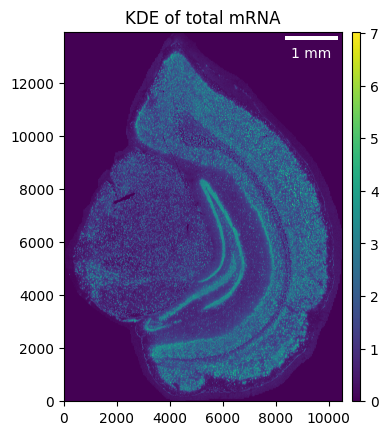

In [3]:
brain.gaussian_kernel(4, unit="um")
brain.calculate_total_mRNA_KDE()

_ = brain.plot_KDE()

Looking at the distribution of the KDE can help define a threshold for the background.

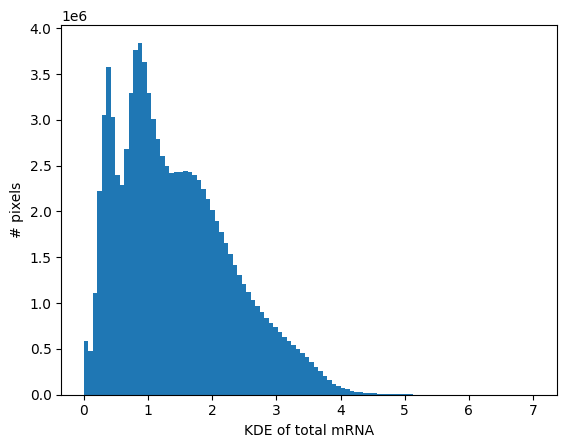

In [4]:
_ = brain.plot_KDE_histogram(bins=100)

In [5]:
brain.filter_background(0.7)

Next, we load our cell-type signatures (26 cell types based on 247 genes) that we will use to generate the cell-type map.

In [6]:
from sainsc.datasets import fetch_brain_signatures

signatures = fetch_brain_signatures()
signatures.iloc[:, :4].head()

,Arterial,Astro,Axo-axonic,CA1
gene,,,,
2010300C02Rik,0.001679,0.005594,0.005623,0.019133
Acsbg1,0.007187,0.026068,0.003556,0.002965
Acta2,0.016084,0.001085,0.001476,0.001769
Acvrl1,0.016812,0.000594,0.000210,0.000292
Adamts2,0.002196,0.001317,0.000424,0.001882


Now we are ready to generate the cell-type map.

In [7]:
brain.assign_celltype(signatures)

print(brain)

LazyKDE (8 threads)
    genes: 26177
    shape: (10500, 13950)
    resolution: 500.0 nm / px
    kernel: (33, 33)
    background: set
    celltypes: 26


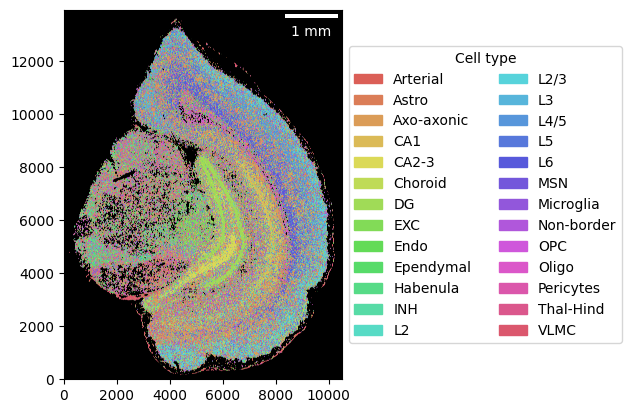

In [8]:
_ = brain.plot_celltype_map()